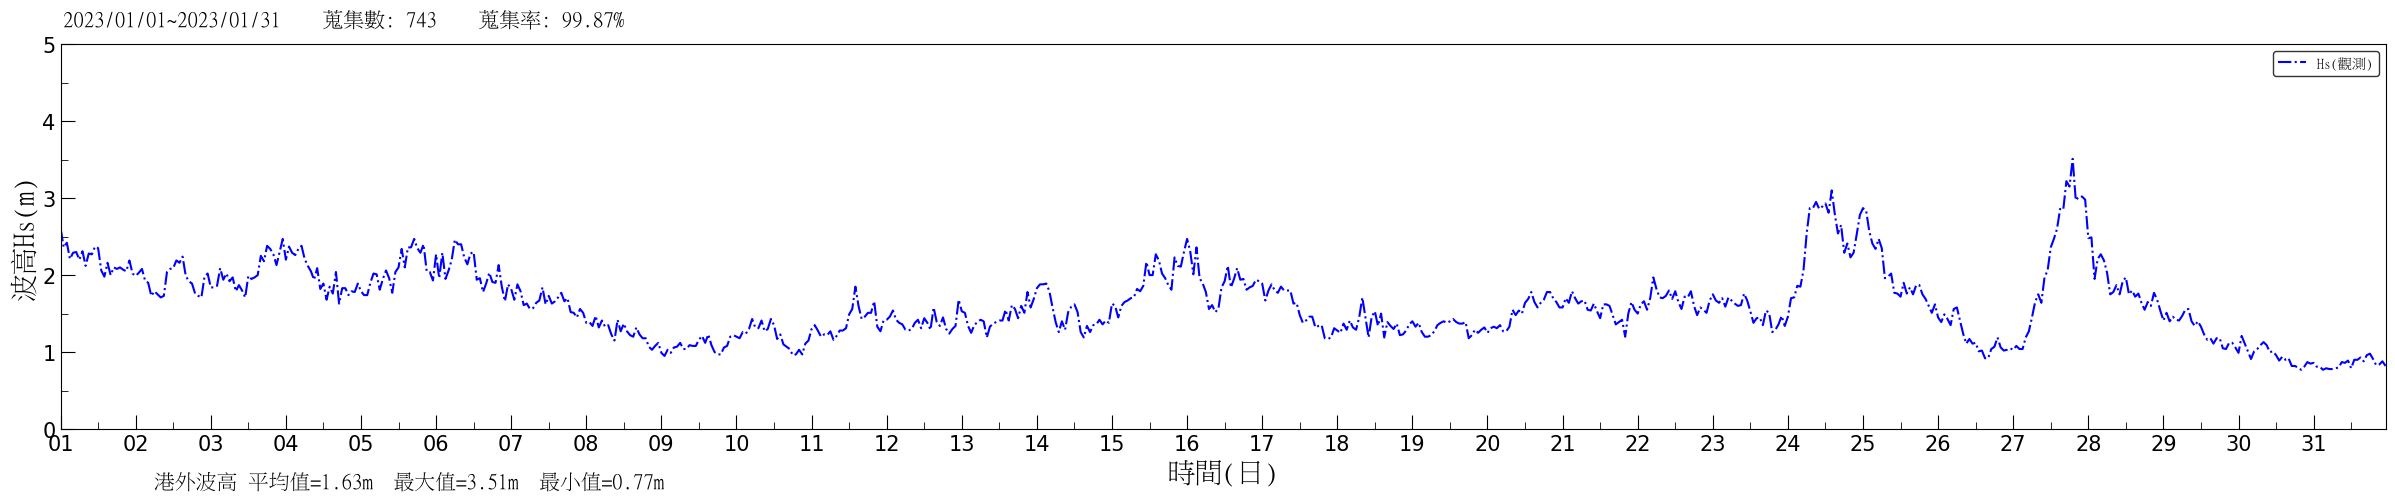

In [34]:
#畫一個月的歷線圖
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font
import pandas as pd
import matplotlib.dates as mdates

# 設定字型
font1 = font(fname="c:\\WINDOWS\\FONTS\\MINGLIU.TTC")

# 讀取 CSV 檔案
df = pd.read_csv('wave.csv')

# 確保 'Date_Time' 欄位為日期格式
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# 設定索引
index = df['Date_Time']
values = df['港外波高_HS']

# 計算蒐集數與蒐集率
data_count = values.count()
total_expected = 744  # 預期的總數據筆數
collection_rate = (data_count / total_expected) * 100

# 計算平均值、最大值、最小值
mean_value = values.mean()
max_value = values.max()
min_value = values.min()

# 繪圖
figure = plt.figure(figsize=(30, 5))
axes = figure.add_subplot()
plt.ylabel('波高Hs(m)', fontproperties=font1, fontsize=20)
plt.xlabel('時間(日)', fontproperties=font1, fontsize=20)

axes.plot(index, values, 'b-.', label='Hs(觀測)')

# 設定 x 軸格式
axes.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # 只顯示日期的數字
axes.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 每一天的主要刻度
axes.xaxis.set_minor_locator(mdates.HourLocator(byhour=[12]))  # 從 01 日的半天開始，每隔一天出現一次小刻度

# 設定 y 軸格式
axes.yaxis.set_major_locator(plt.MultipleLocator(1))  # 1m 一個主要刻度
axes.yaxis.set_minor_locator(plt.MultipleLocator(0.5))  # 0.5m 一個小刻度
axes.set_ylim(0, 5)  # y 軸範圍設定為 0 至 5

# 限制 x 軸範圍為該月份的 1 至 31 日
axes.set_xlim(index.min().replace(day=1), index.max().replace(day=31))

# 刻度向內，並設定不同長度的刻度
axes.tick_params(axis='x', which='major', direction='in', length=10, labelsize=15)  # 整數天的主要刻度較長
axes.tick_params(axis='x', which='minor', direction='in', length=5)   # 半天的小刻度較短
axes.tick_params(axis='y', which='major', direction='in', length=10, labelsize=15)  # y 軸整數刻度較長
axes.tick_params(axis='y', which='minor', direction='in', length=5)   # y 軸小刻度較短


# 加上圖例，並設置中文字型與較大字體
axes.legend(loc='upper right', prop=font1, edgecolor='#000', fontsize=15)

# 加上數據的起始日期~結束日期、蒐集數與蒐集率標註
start_date = index.min().strftime('%Y/%m/%d')
end_date = index.max().strftime('%Y/%m/%d')
info_text = f'{start_date}~{end_date}    蒐集數: {data_count}    蒐集率: {collection_rate:.2f}%'
plt.text(0.001, 1.05, info_text, transform=axes.transAxes, fontsize=15, fontproperties=font1)

# 在圖下方顯示平均值、最大值、最小值
stats_text = f'港外波高 平均值={mean_value:.2f}m  最大值={max_value:.2f}m  最小值={min_value:.2f}m'
plt.text(0.15, -0.15, stats_text, transform=axes.transAxes, fontsize=15, fontproperties=font1, ha='center')

plt.show()